## Required Packages

In [1]:
#install.packages("devtools")    
#devtools::install_github("algopoly/EVDS")
#devtools::install_github("PMassicotte/gtrendsR")

library(EVDS)
library(ggplot2)
library(gtrendsR)
library(zoo)
require(data.table)

set_evds_key("u7E0TFJtsE")

EVDS requires an API key from CBRT. Get yours from https://evds2.tcmb.gov.tr/index.php?/evds/editProfile 

      All functions require an API key so you should set your key with set_evds_key("YOURAPIKEY") function.
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: data.table


## Data Manipulation

In [2]:
df <- get_series(series = c("TP.DK.USD.A.YTL", "TP.TRY.MT04.K", "TP.IHRACATBEC.9999", "TP.ELEKTUKETIM.TKT1"), 
                 start_date = "01-01-2017", end_date = "01-12-2020")
df$items$UNIXTIME <- NULL

df <- df$items
colnames(df) <- c("Date", "USDTRY","InterestRate", "ForeignTrade", "ElcCons")
dt <- data.table(df)

In [3]:
dt[, `:=`(Date = as.Date(as.yearmon(dt$Date)),
         USDTRY = as.numeric(dt$USDTRY),
         InterestRate = as.numeric(dt$InterestRate),
         ForeignTrade= as.numeric(dt$ForeignTrade),
         ElcCons = as.numeric(dt$ElcCons)),]
head(dt)

Date,USDTRY,InterestRate,ForeignTrade,ElcCons
2017-01-01,3.734886,11.50,11738728,809759.5
2017-02-01,3.672360,11.85,12643609,801841.2
2017-03-01,3.665943,13.10,15075608,760854.8
2017-04-01,3.653835,14.15,13420426,731778.7
2017-05-01,3.563862,14.90,14213768,737224.7
2017-06-01,3.518990,15.25,13671984,743457.3


#### columns  
USDTRY.......: exchange rate  (buying)  
InterestRate..: up to 1 year effective maximum interest rates for deposits of State Banks (stock data, %)  
ForeignTrade: foreign trade by general trade system exports by classification of broad economic categories (thousand USD)  
ElcCons........: daily electricity consumption (MWh)

In [4]:
summary(dt[,2:5])

     USDTRY       InterestRate    ForeignTrade         ElcCons      
 Min.   :3.468   Min.   : 9.10   Min.   : 8978638   Min.   :633604  
 1st Qu.:3.830   1st Qu.:13.01   1st Qu.:13403705   1st Qu.:760523  
 Median :5.533   Median :14.96   Median :14653390   Median :798601  
 Mean   :5.286   Mean   :16.82   Mean   :14420909   Mean   :796209  
 3rd Qu.:6.046   3rd Qu.:20.88   3rd Qu.:15539921   3rd Qu.:835321  
 Max.   :8.003   Max.   :29.75   Max.   :17852409   Max.   :911801  

## Data Visualization & Analysis

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


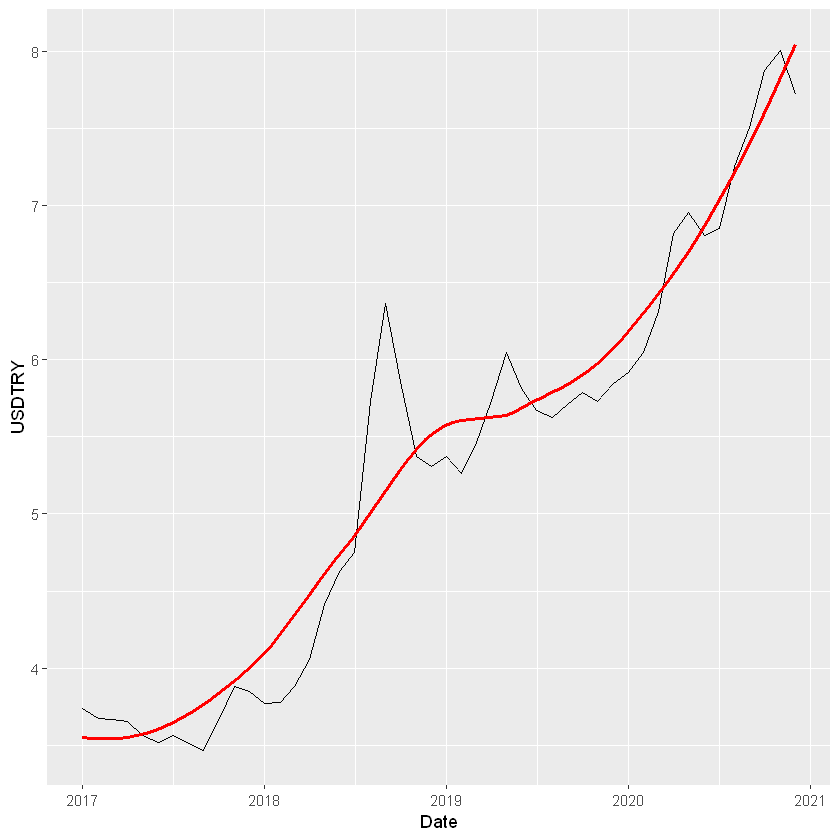

In [5]:
ggplot(dt, aes(x=Date, y=USDTRY)) + geom_line() + geom_smooth(se=F, color="red")

* It seems that there is an increasing trend. The smooted curve (red one) has a positive slope.  
* There is no quarterly or monthly similarity over the 4 years.  
* Increasing rate is accelerating in the first two quarters of the year 2018. Also there is a jumping point in the middle of third quarter. 
* At the beginning of the pandemic, there is a falling point. After, increasing trend continues.

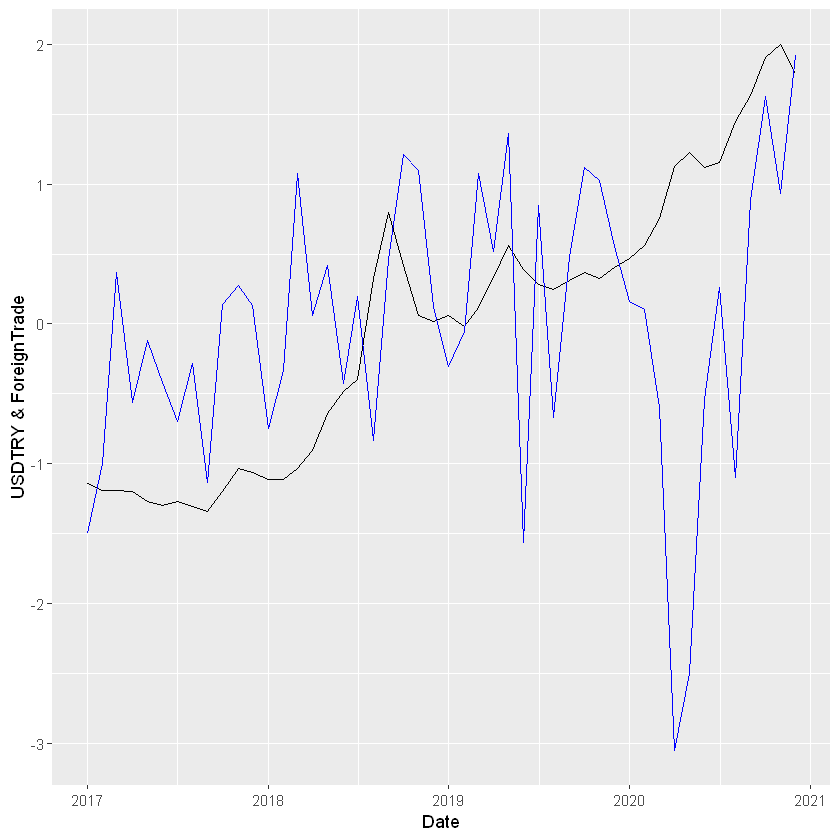

In [6]:
ggplot(dt, aes(x=Date)) + geom_line(aes(y=scale(USDTRY), col="USDTRY"), color="black") + geom_line(
    aes(y=scale(ForeignTrade), col="ForeignTrade"), color="blue") + labs(y="USDTRY & ForeignTrade")

#### ForeignTrade (blue line)
* There is an increasing trend.   
* We can say that there is a monthly seasonality. For example, at the beginning of each year, there is an increase followed by a decrease.  
* At the beginning of the pandemic, there is a huge fall due to the restrictions. 

#### Relationship
The highest foreign trade is, the more currency we earn. Increase in the dollar supply causes to decrease in the rate. Therefore, I thought that it can be used to explain the USDTRY rate, but it seems that is fails. 

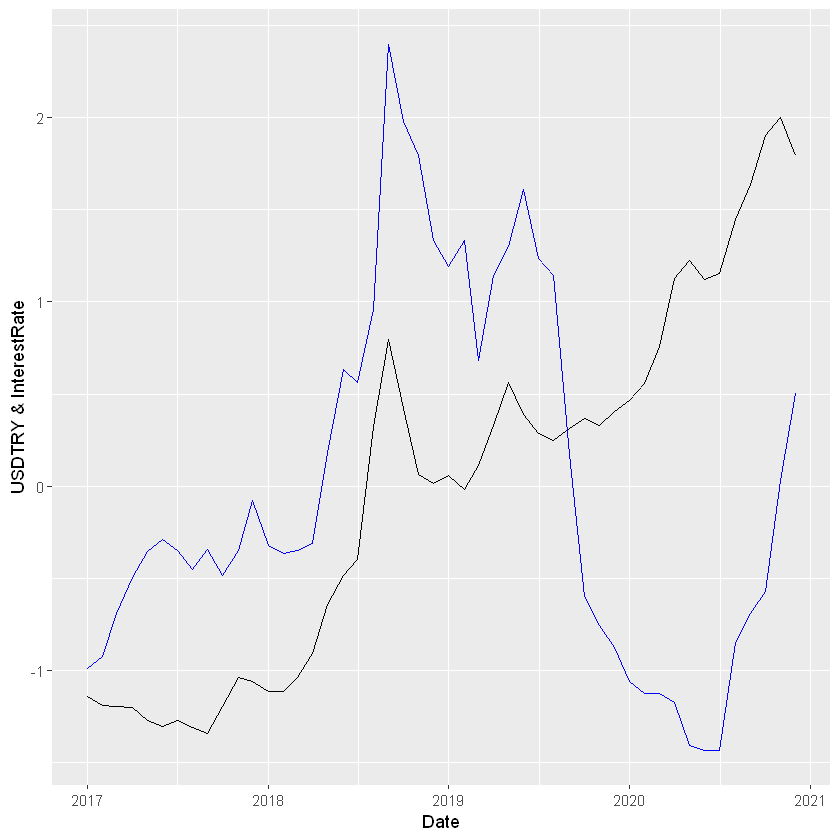

In [7]:
ggplot(dt, aes(x=Date)) + geom_line(aes(y=scale(USDTRY), col="USDTRY"), color="black") + geom_line(
    aes(y=scale(InterestRate), col="InterestRate"), color="blue") + labs(y="USDTRY & InterestRate")

#### InterestRate (blue line)
* There is no trend. The reason may be that interest rates are determined by the government.  
* Because there is not any pattern observed in the data, we cannot say anything about abnormal observations. 
* At the beginning of the pandemic, there is a huge falling.  

#### Relationship
Before the third quarter of the year 2019, there is a positive correlation between two lines.

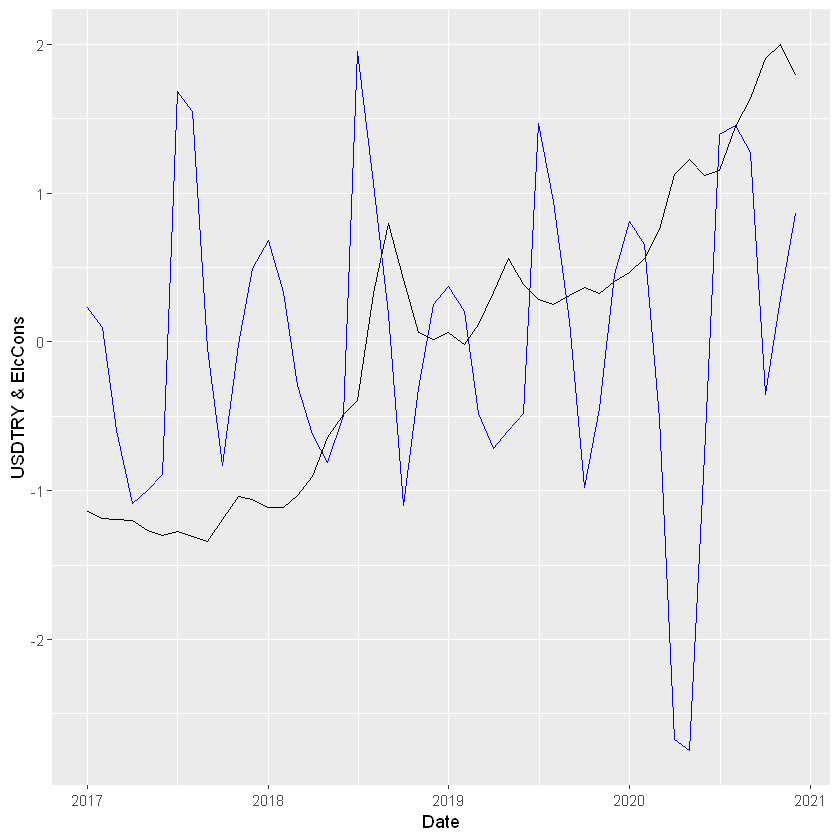

In [8]:
ggplot(dt, aes(x=Date)) + geom_line(aes(y=scale(USDTRY), col="USDTRY"), color="black") + geom_line(
    aes(y=scale(ElcCons), col="ElcCons"), color="blue") + labs(y="USDTRY & ElcCons")


#### ElcCons (blue line)
* There is a slow increasing trend.  
* Quarterly seasonality is observed. 
* Obviously, electricity consumption is decreasing point during the pandemic.  

#### Relationship
Electricity consumption is related with production, which is also related to GDP. I thought that GDP can be used for forecasting USDTRY rate but it seems that it fails. 

## Google Trends Search

In [9]:
gtrendsData <- gtrends(keyword = c("dolar", "dolar kuru", "döviz"), time = "2017-01-01 2020-12-01", geo = "TR")
searchResults <- data.table(gtrendsData$interest_over_time)

searchResults[, `:=`(date = as.Date(searchResults$date),
                     hits = as.numeric(searchResults$hits)),]

dt_gtrends <- data.table(Date=searchResults$date, Dolar=searchResults[searchResults$keyword=="dolar", ,]$hits, 
                      DolarKuru=searchResults[searchResults$keyword=="dolar kuru", ,]$hits, 
                      Döviz=searchResults[searchResults$keyword=="döviz", ,]$hits)
head(dt_gtrends)

Warning message in eval(jsub, SDenv, parent.frame()):
"NAs introduced by coercion"

Date,Dolar,DolarKuru,Döviz
2017-01-01,4,1,2
2017-01-08,13,2,5
2017-01-15,7,1,3
2017-01-22,7,1,3
2017-01-29,7,1,3
2017-02-05,7,1,3


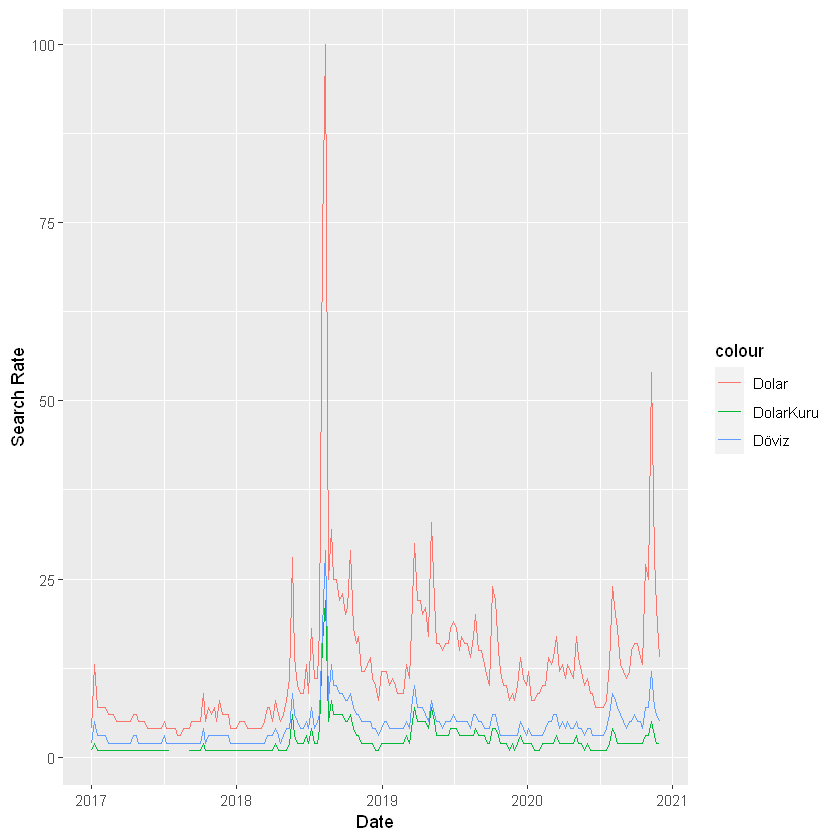

In [10]:
ggplot(dt_gtrends, aes(x=Date))+geom_line(aes(y=Dolar, 
                                              col="Dolar"))+geom_line(aes(y=DolarKuru, 
                                                                          col="DolarKuru"))+geom_line(aes(y=Döviz, 
                                                                                                          col="Döviz")) + labs(y="Search Rate")

* There is a jumping point at the third period of 2018, which is related to high increase in USDTRY rate.
* High search rate in the second quarter of 2019 is also related to the unexpected increase in USDTRY rate. 